In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv(
    filepath_or_buffer='Transjakarta.csv'
)

df

In [ ]:
# Cara gambar grafik pake python

grafik_data = sns.histplot(data=df['payCardBirthDate'], kde=True)
plt.show(grafik_data)

In [ ]:
# Cara load data dari seaborn

tips_data = sns.load_dataset(name='tips')
tips_data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [8]:
tips_data.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


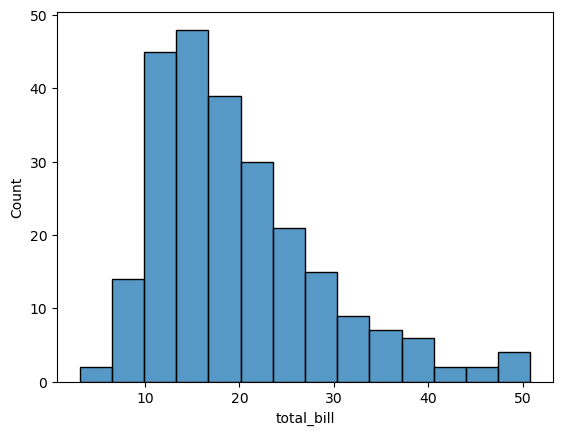

In [5]:
tips_histogram = sns.histplot(data=tips_data['total_bill'])
plt.show(tips_histogram)

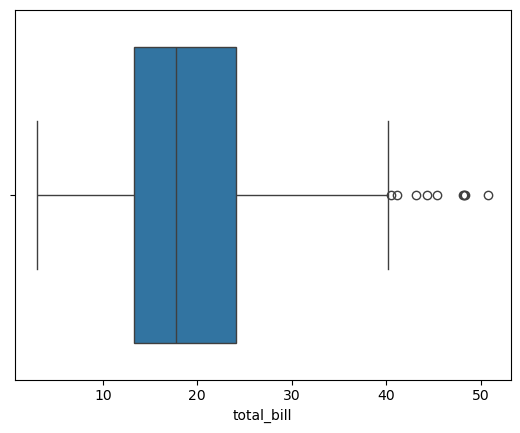

In [6]:
tips_boxplot = sns.boxplot(data=tips_data['total_bill'], orient='y')
plt.show(tips_boxplot)

In [12]:
tips_data.groupby(by=['day', 'sex'],observed=True).aggregate('count')

total_bill  tip  smoker  time  size
day  sex                                        
Thur Male            30   30      30    30    30
     Female          32   32      32    32    32
Fri  Male            10   10      10    10    10
     Female           9    9       9     9     9
Sat  Male            59   59      59    59    59
     Female          28   28      28    28    28
Sun  Male            58   58      58    58    58
     Female          18   18      18    18    18